<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Lyrics_Classification_TFID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [6]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV2


In [7]:
dataset = pd.read_csv('Lyrical_data_3.csv',encoding='cp1252')

In [9]:
dataset.head(10)

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Sad
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love
5,6,Through the dark,"You tell me that you hurt, it's all in vain\rB...",Inspiration
6,7,Sober,"I don't know, I don't know, I don't know, I do...",Sad
7,8,Happier,Walking down 29th and Park\nI saw you in anoth...,Sad
8,9,Save my life,Life can get you down so I just numb the way i...,Sad
9,10,Shape of you,The club isn't the best place to find a lover\...,Happy


In [11]:
lyrics = dataset['Chorus']
lyrics

0      Diana,\rLet me be the one to light a fire insi...
1      Don't forget where you belong\rHome\rDon't for...
2      I'm sorry if I say, "I need you"\nBut I don't ...
3      I don't care what people say when we're togeth...
4      Better than words\rMore than a feeling Crazy i...
                             ...                        
795                                                  NaN
796                                                  NaN
797                                                  NaN
798                                                  NaN
799                                                  NaN
Name: Chorus, Length: 800, dtype: object

In [12]:
dataset.dropna(how='all', axis=1, inplace=True)

In [13]:
dataset.head(10)

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Sad
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love
5,6,Through the dark,"You tell me that you hurt, it's all in vain\rB...",Inspiration
6,7,Sober,"I don't know, I don't know, I don't know, I do...",Sad
7,8,Happier,Walking down 29th and Park\nI saw you in anoth...,Sad
8,9,Save my life,Life can get you down so I just numb the way i...,Sad
9,10,Shape of you,The club isn't the best place to find a lover\...,Happy


In [14]:
lyrics2 = dataset['Chorus']
lyrics2

0      Diana,\rLet me be the one to light a fire insi...
1      Don't forget where you belong\rHome\rDon't for...
2      I'm sorry if I say, "I need you"\nBut I don't ...
3      I don't care what people say when we're togeth...
4      Better than words\rMore than a feeling Crazy i...
                             ...                        
795                                                  NaN
796                                                  NaN
797                                                  NaN
798                                                  NaN
799                                                  NaN
Name: Chorus, Length: 800, dtype: object

Checking the empty rows in dataset

In [15]:
print (dataset.isnull().sum())

Song_ID         0
Song_Title      0
Chorus        290
Emotion       290
dtype: int64


In [16]:
modifiedDF = dataset.dropna()
modifiedDF

,Song_ID,Song_Title,Chorus,Emotion
0,1,Diana,"Diana,\rLet me be the one to light a fire insi...",Inspiration
1,2,Don't forget where you belong,Don't forget where you belong\rHome\rDon't for...,Inspiration
2,3,Strong,"I'm sorry if I say, ""I need you""\nBut I don't ...",Inspiration
3,4,Happily,I don't care what people say when we're togeth...,Sad
4,5,Better than words,Better than words\rMore than a feeling Crazy i...,Love
...,...,...,...,...
505,506,Crazy In Love,Crazy In Love,Love
506,507,Thank You Next,Thank You Next,Happy
507,508,I Wanna Dance With Somebody,I Wanna Dance With Somebody,Happy
508,509,Up,Up,Inspiration


In [18]:
modifiedDF['Chorus'].apply(lambda x: len(x.split(' '))).sum()
#We have 24,461 words in data

24461

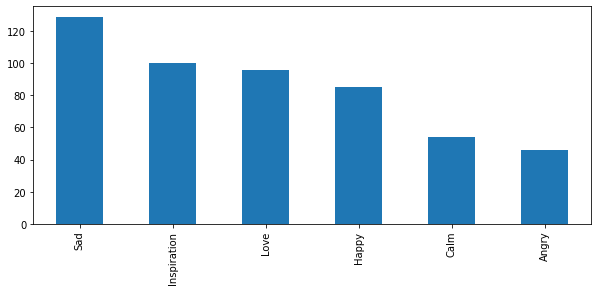

In [21]:
my_emotions = ['Happy','Sad','Calm','Inspiration','Angry','Love']
plt.figure(figsize=(10,4))
modifiedDF.Emotion.value_counts().plot(kind='bar');

In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 509):
  Lyrics = re.sub('[^a-zA-Z]', ' ', modifiedDF['Chorus'][i])
  Lyrics = Lyrics.lower()
  Lyrics = Lyrics.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  all_stopwords.remove('down')
  Lyrics = [ps.stem(word) for word in Lyrics if not word in set(all_stopwords)]
  Lyrics = ' '.join(Lyrics)
  corpus.append(Lyrics)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
modifiedDF['Chorus'].apply(lambda x: len(x.split(' '))).sum()
#We have 24,461 words in data

24461

Print corpus

In [24]:
print(corpus)

['diana let one light fire insid eye lone even know feel cri diana let one lift heart save life think even realiz babi save mine', 'forget belong home forget belong home ever feel alon never proof song', 'sorri say need care not scare love caus not weaker wrong wrong make strong', 'care peopl say togeth know wanna one hold sleep want forev know wanna leav c mon babi happili', 'better word feel crazi love danc ceil everi time touch shook make wanna deep love god know babi', 'tell hurt vain see heart love rememb laugh let laugh burn even scream shout come back back oh carri fire water love hold closer hope heart strong enough night come down find way dark', 'know know know know everi everi everi time lone sometim wanna cave wanna fight tri tri tri tri tri hold lone momma sorri not sober anymor daddi pleas forgiv drink spill floor one never left down road sorri not sober anymor not sober anymor sorri promis get help intent sorri', 'walk down th park saw anoth arm month apart look happier 

Creating the bag of words modal

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = modifiedDF.iloc[0:509, -1].values

Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Naive Bayes classifier for multinomial models

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

In [33]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.42483660130718953
              precision    recall  f1-score   support

       Happy       0.00      0.00      0.00        12
         Sad       0.00      0.00      0.00        15
        Calm       1.00      0.04      0.07        28
 Inspiration       0.30      0.46      0.36        26
       Angry       0.44      0.52      0.48        23
        Love       0.47      0.82      0.60        49

    accuracy                           0.42       153
   macro avg       0.37      0.31      0.25       153
weighted avg       0.45      0.42      0.34       153

CPU times: user 16.4 ms, sys: 641 µs, total: 17 ms
Wall time: 21.4 ms


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Linear support vector machine

In [34]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [35]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.3790849673202614
              precision    recall  f1-score   support

       Happy       0.09      0.08      0.09        12
         Sad       0.39      0.47      0.42        15
        Calm       0.31      0.14      0.20        28
 Inspiration       0.31      0.38      0.34        26
       Angry       0.37      0.57      0.45        23
        Love       0.52      0.47      0.49        49

    accuracy                           0.38       153
   macro avg       0.33      0.35      0.33       153
weighted avg       0.38      0.38      0.37       153

CPU times: user 15.5 ms, sys: 0 ns, total: 15.5 ms
Wall time: 16.4 ms


Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [37]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_emotions))

accuracy 0.43137254901960786
              precision    recall  f1-score   support

       Happy       0.20      0.08      0.12        12
         Sad       0.33      0.47      0.39        15
        Calm       0.33      0.14      0.20        28
 Inspiration       0.27      0.38      0.32        26
       Angry       0.54      0.57      0.55        23
        Love       0.57      0.63      0.60        49

    accuracy                           0.43       153
   macro avg       0.38      0.38      0.36       153
weighted avg       0.42      0.43      0.41       153

CPU times: user 12.9 ms, sys: 1.94 ms, total: 14.8 ms
Wall time: 17.5 ms


BOW with keras

In [40]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [41]:
train_size = int(len(modifiedDF) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(modifiedDF) - train_size))

Train size: 357
Test size: 153


In [42]:
train_posts = modifiedDF['Chorus'][:train_size]
train_tags = modifiedDF['Emotion'][:train_size]

test_posts = modifiedDF['Chorus'][train_size:]
test_tags = modifiedDF['Emotion'][train_size:]

In [43]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [44]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [45]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [47]:
from tensorflow.keras.utils import to_categorical

In [49]:
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [50]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (357, 1000)
x_test shape: (153, 1000)
y_train shape: (357, 6)
y_test shape: (153, 6)


In [142]:
batch_size = 10
epochs = 500

In [143]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [144]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/500
29/29 [==============================] - 1s 12ms/step - loss: 1.7268 - accuracy: 0.2491 - val_loss: 1.6186 - val_accuracy: 0.3750
Epoch 2/500
29/29 [==============================] - 0s 6ms/step - loss: 1.2817 - accuracy: 0.6316 - val_loss: 1.5472 - val_accuracy: 0.4306
Epoch 3/500
29/29 [==============================] - 0s 6ms/step - loss: 0.9507 - accuracy: 0.7754 - val_loss: 1.4882 - val_accuracy: 0.4722
Epoch 4/500
29/29 [==============================] - 0s 6ms/step - loss: 0.6756 - accuracy: 0.8912 - val_loss: 1.4439 - val_accuracy: 0.4167
Epoch 5/500
29/29 [==============================] - 0s 6ms/step - loss: 0.4728 - accuracy: 0.9474 - val_loss: 1.4436 - val_accuracy: 0.4444
Epoch 6/500
29/29 [==============================] - 0s 6ms/step - loss: 0.3398 - accuracy: 0.9684 - val_loss: 1.4537 - val_accuracy: 0.4306
Epoch 7/500
29/29 [==============================] - 0s 6ms/step - loss: 0.2486 - accuracy: 0.9895 - val_loss: 1.4527 - val_accuracy: 0.4444
Epoch 8/500


In [145]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 5.1738 - accuracy: 0.3791
Test accuracy: 0.379084974527359
